In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
csv_path = 'Myntra dataset.csv'
df = pd.read_csv(csv_path)
df.head()


,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,images
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,http://assets.myntassets.com/assets/images/100...
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,http://assets.myntassets.com/assets/images/100...
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink,http://assets.myntassets.com/assets/images/100...
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue,http://assets.myntassets.com/assets/images/pro...
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White,http://assets.myntassets.com/assets/images/pro...


In [3]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
images            0
dtype: int64


In [4]:
# Fill missing values in the 'PrimaryColor' column with a specific word, e.g., 'other'
df['PrimaryColor'] = df['PrimaryColor'].fillna('other')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Display the DataFrame
print(df)


Missing values:
 ProductID       0
ProductName     0
ProductBrand    0
Gender          0
Price (INR)     0
NumImages       0
Description     0
PrimaryColor    0
images          0
dtype: int64
       ProductID                                        ProductName  \
0       10017413  DKNY Unisex Black & Grey Printed Medium Trolle...   
1       10016283  EthnoVogue Women Beige & Grey Made to Measure ...   
2       10009781  SPYKAR Women Pink Alexa Super Skinny Fit High-...   
3       10015921  Raymond Men Blue Self-Design Single-Breasted B...   
4       10017833  Parx Men Brown & Off-White Slim Fit Printed Ca...   
...          ...                                                ...   
12486   10262843  Pepe Jeans Men Black Hammock Slim Fit Low-Rise...   
12487   10261721                 Mochi Women Gold-Toned Solid Heels   
12488   10261607  612 league Girls Navy Blue & White Printed Reg...   
12489   10266621  Bvlgari Men Aqva Pour Homme Marine Eau de Toil...   
12490   10265199  Pepe Jean

In [5]:

print("Data types before conversion:\n", df.dtypes)

Data types before conversion:
 ProductID        int64
ProductName     object
ProductBrand    object
Gender          object
Price (INR)      int64
NumImages        int64
Description     object
PrimaryColor    object
images          object
dtype: object


In [6]:
# Convert relevant columns to lowercase
df['Description'] = df['Description'].str.lower()
df['ProductName'] = df['ProductName'].str.lower()
df['ProductBrand'] = df['ProductBrand'].str.lower()
df['Gender'] = df['Gender'].str.lower()

# Check the DataFrame
print(df)


       ProductID                                        ProductName  \
0       10017413  dkny unisex black & grey printed medium trolle...   
1       10016283  ethnovogue women beige & grey made to measure ...   
2       10009781  spykar women pink alexa super skinny fit high-...   
3       10015921  raymond men blue self-design single-breasted b...   
4       10017833  parx men brown & off-white slim fit printed ca...   
...          ...                                                ...   
12486   10262843  pepe jeans men black hammock slim fit low-rise...   
12487   10261721                 mochi women gold-toned solid heels   
12488   10261607  612 league girls navy blue & white printed reg...   
12489   10266621  bvlgari men aqva pour homme marine eau de toil...   
12490   10265199  pepe jeans men black & grey striped polo colla...   

      ProductBrand  Gender  Price (INR)  NumImages  \
0             dkny  unisex        11745          7   
1       ethnovogue   women         5810

In [7]:
# Define the extract_category function with added 'T-shirt' category
def extract_category(name):
    common_categories = {
        'Trolley Bag': ['Trolley Bag'],
        'Cropped Jeans': ['Cropped Jeans'],
        'Bandhgala Suit': ['Bandhgala Suit'],
        'Casual Shirt': ['Casual Shirt'],
        'Regular Shorts': ['Regular Shorts'],
        'Ankle Jeans': ['Ankle Jeans'],
        'Regular Trousers': ['Regular Trousers'],
        'Jacket': ['Jacket'],
        'Kurta': ['Kurta'],
        'Shirt': ['Shirt'],
        'Suit': ['Suit'],
        'Jeans': ['Jeans'],
        'Shorts': ['Shorts'],
        'Bag': ['Bag'],
        'Trousers': ['Trousers'],
        'Watch': ['Watch', 'watch'],
        'T-shirt': ['T-shirt']  # Added T-shirt category
    }
    
    name_lower = name.lower()
    for category, variations in common_categories.items():
        for variation in variations:
            if variation.lower() in name_lower:
                return category
    
    parts = name.split()
    if len(parts) > 2:
        category = ' '.join(parts[-2:])
    else:
        category = name
    
    return category

# Apply the refined function to the 'name' column to create a new 'category' column
df['extracted_category'] = df['ProductName'].apply(extract_category)

# Display unique values and their counts in the 'category' column
category_counts = df['extracted_category'].value_counts()
print(category_counts)

# Display the updated DataFrame with the 'extracted_category' column
print(df)


extracted_category
Shirt                2198
Casual Shirt         1265
Kurta                 878
Jeans                 694
Jacket                352
                     ... 
colorblock hoodie       1
striped sneakers        1
square pot              1
floral jhumkas          1
toilette 150ml          1
Name: count, Length: 1504, dtype: int64
       ProductID                                        ProductName  \
0       10017413  dkny unisex black & grey printed medium trolle...   
1       10016283  ethnovogue women beige & grey made to measure ...   
2       10009781  spykar women pink alexa super skinny fit high-...   
3       10015921  raymond men blue self-design single-breasted b...   
4       10017833  parx men brown & off-white slim fit printed ca...   
...          ...                                                ...   
12486   10262843  pepe jeans men black hammock slim fit low-rise...   
12487   10261721                 mochi women gold-toned solid heels   
12488   10261607

In [8]:
column_names = df.columns
print(column_names)


Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor', 'images',
       'extracted_category'],
      dtype='object')


In [9]:
df = df.drop(columns=['NumImages'])
df

,ProductID,ProductName,ProductBrand,Gender,Price (INR),Description,PrimaryColor,images,extracted_category
0,10017413,dkny unisex black & grey printed medium trolle...,dkny,unisex,11745,"black and grey printed medium trolley bag, sec...",Black,http://assets.myntassets.com/assets/images/100...,Trolley Bag
1,10016283,ethnovogue women beige & grey made to measure ...,ethnovogue,women,5810,beige & grey made to measure kurta with churid...,Beige,http://assets.myntassets.com/assets/images/100...,Jacket
2,10009781,spykar women pink alexa super skinny fit high-...,spykar,women,899,pink coloured wash 5-pocket high-rise cropped ...,Pink,http://assets.myntassets.com/assets/images/100...,Cropped Jeans
3,10015921,raymond men blue self-design single-breasted b...,raymond,men,5599,blue self-design bandhgala suitblue self-desig...,Blue,http://assets.myntassets.com/assets/images/pro...,Bandhgala Suit
4,10017833,parx men brown & off-white slim fit printed ca...,parx,men,759,"brown and off-white printed casual shirt, has ...",White,http://assets.myntassets.com/assets/images/pro...,Casual Shirt
...,...,...,...,...,...,...,...,...,...
12486,10262843,pepe jeans men black hammock slim fit low-rise...,pepe jeans,men,1299,"black dark wash 5-pocket low-rise jeans, clean...",Black,http://assets.myntassets.com/assets/images/102...,Jeans
12487,10261721,mochi women gold-toned solid heels,mochi,women,1990,"a pair of gold-toned open toe heels, has regul...",Gold,http://assets.myntassets.com/assets/images/pro...,solid heels
12488,10261607,612 league girls navy blue & white printed reg...,612 league,girls,602,navy blue and white printed mid-rise denim sho...,Blue,http://assets.myntassets.com/assets/images/102...,Shorts
12489,10266621,bvlgari men aqva pour homme marine eau de toil...,bvlgari,men,8950,bvlgari men aqva pour homme marine eau de toil...,other,http://assets.myntassets.com/assets/images/102...,toilette 150ml


C:\Users\DEEPAK KOTTALI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


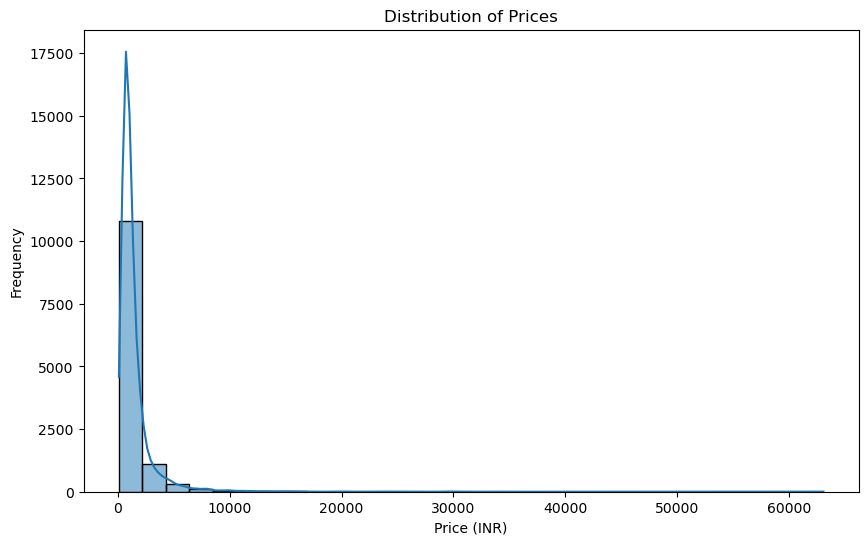

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price (INR)'].dropna(), bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()


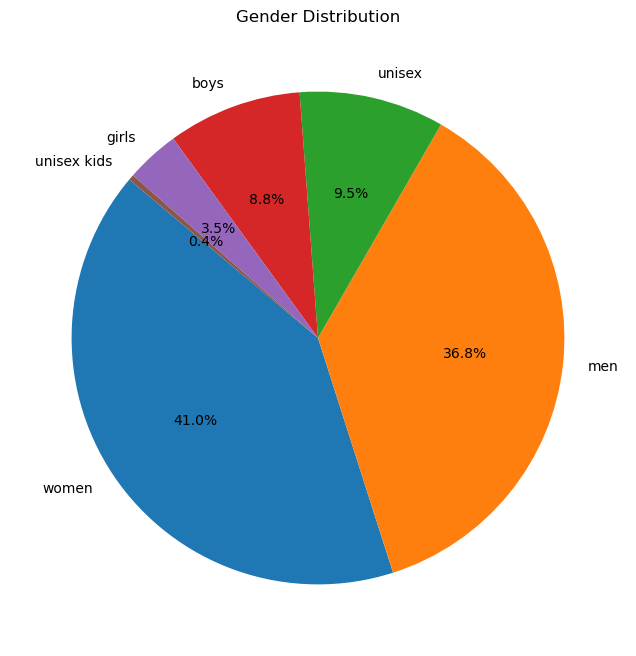

In [11]:
# Example: Pie chart of gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

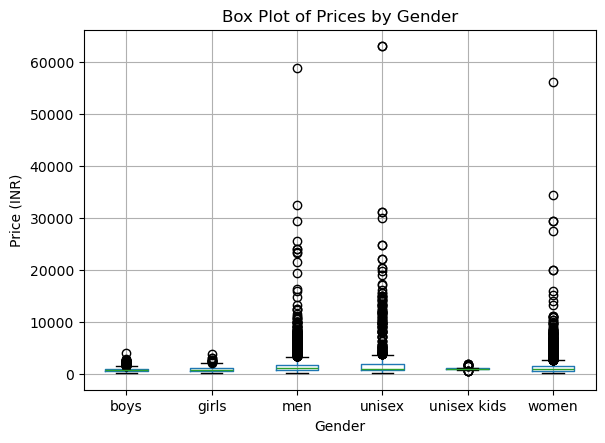

In [12]:
df.boxplot(column='Price (INR)', by='Gender')
plt.xlabel('Gender')
plt.ylabel('Price (INR)')
plt.title('Box Plot of Prices by Gender')
plt.suptitle('')  # Suppress the default title to avoid duplication
plt.show()


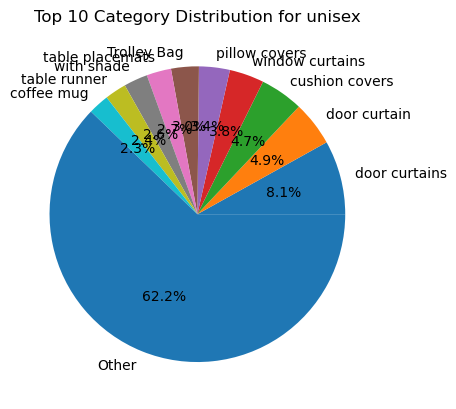

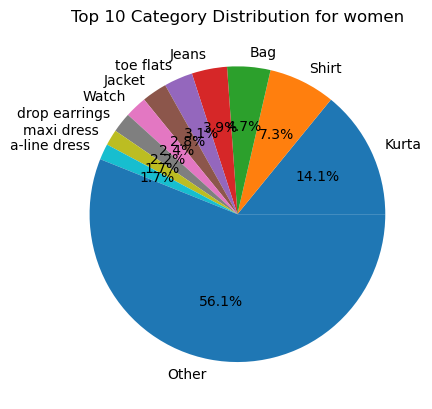

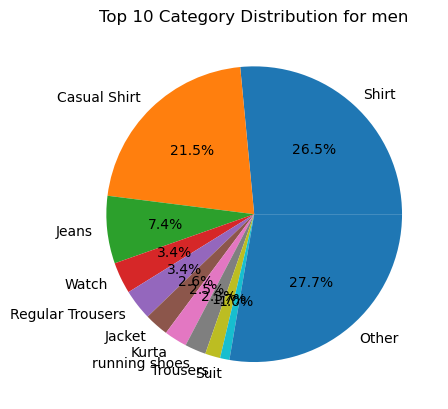

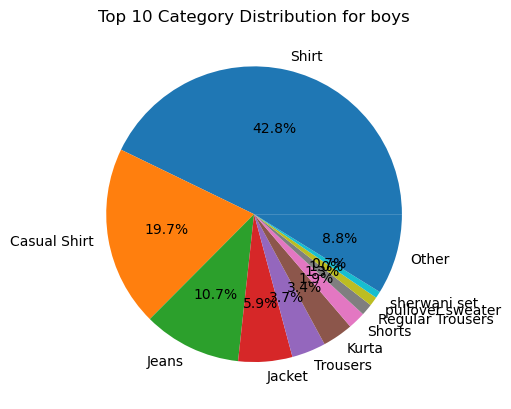

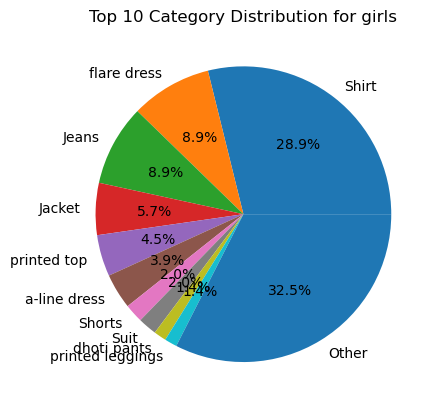

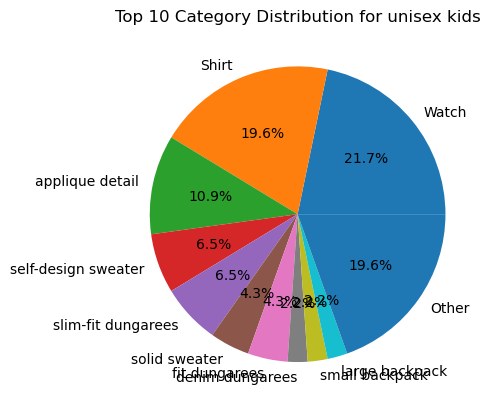

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already extracted categories and added them to your DataFrame
# For example:
# df['extracted_category'] = extracted_category(df)

# Loop through each unique gender
for gender in df['Gender'].unique():
    plt.figure()
    
    # Get the value counts for the categories of the current gender
    category_counts = df[df['Gender'] == gender]['extracted_category'].value_counts()
    
    # Get the top 10 categories
    top_10_categories = category_counts.head(10)
    
    # Aggregate the counts for categories outside the top 10 into an "Other" category
    other_count = category_counts[10:].sum()
    top_10_categories['Other'] = other_count
    
    # Plot the pie chart
    top_10_categories.plot(kind='pie', autopct='%1.1f%%', title=f'Top 10 Category Distribution for {gender}')
    plt.ylabel('')  # Hide the y-label
    plt.show()


In [14]:

alphanumeric_count = df['extracted_category'].astype(str).str.isalnum().sum()

# Print the total count
print("Total count of alphanumeric entries:", alphanumeric_count)

Total count of alphanumeric entries: 5080


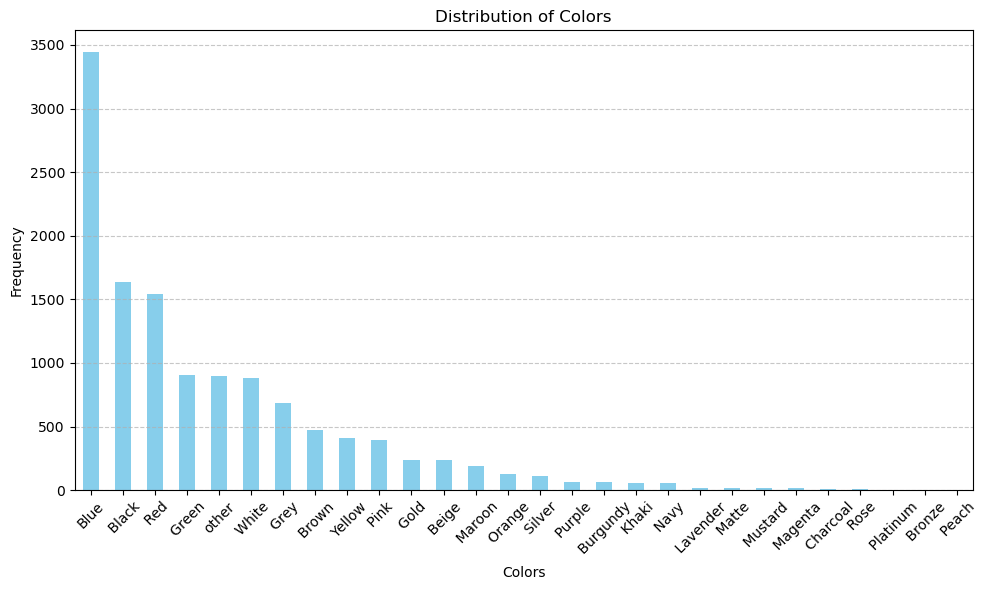

In [15]:
# Count frequency of each color in the 'PrimaryColor' column
color_counts = df['PrimaryColor'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Colors')
plt.xlabel('Colors')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [16]:
# Get unique brands
unique_brands = df['ProductBrand'].unique()
print("Unique brands:", unique_brands)

# Get counts of each brand
brand_counts = df['ProductBrand'].value_counts()
print("Brand counts:\n", brand_counts)


Unique brands: ['dkny' 'ethnovogue' 'spykar' 'raymond' 'parx' 'showoff' 'kenneth cole'
 'police' 'vishudh' 'being human' 'homesake' 'sej by nisha gupta'
 'yak yak' 'parfait' 'michael kors' 'highlander' 'jewel junction' 'id'
 'story@home' 'gini and jony' 'sera' 'accessher' 'alcis'
 'difference of opinion' 'tokyo talkies' 'anna sui' 'her by invictus'
 'soie' 'lara karen' 'urban dog' 'ahilya' 'vastramay' 'campus sutra'
 'fido dido' 'miah decor' 'buckleup' 'peter england' 'aigner' 'lady lyka'
 'park avenue' 'roadster' 'u.s. polo assn. denim co.' 'sweet dreams'
 'kazo' 'stylo bug' 'bvlgari' 'qraa men' 'gas' 'with' 'zush'
 'jbn creation' 'u.s. polo assn. kids' 'dressberry' 'colorplus' 'lakme'
 'allen solly woman' 'palm tree' 'arrow' 'david beckham' 'mango' 'carrera'
 'romee' 'tayhaa' 'ishin' 'shoe couture' 'harbornbay' 'keds' 'rozia'
 'aj dezines' 'monte carlo' 'even' 'ether' 'crimsoune club'
 'russell athletic' 'mimosa' 'puma' 'blackberrys' 'playdate' 'rocia'
 'marvel by wear your mind' 'an

In [17]:
import pandas as pd

# Load the dataset
csv_path = 'Myntra dataset.csv'
df = pd.read_csv(csv_path)

# Define a list of common categories based on the common words
categories = [
    'shirt', 'jeans', 'kurta', 'dress', 'trousers', 't-shirt', 'polo', 'top', 'jacket',
    'suit', 'blazer', 'shorts', 'skirt', 'sweater', 'hoodie', 'leggings', 'saree', 'lehenga',
    'shoes', 'boots', 'sandals', 'sneakers', 'heels', 'flats', 'bag', 'belt', 'hat', 'scarf'
]

# Function to extract the first matching category from the ProductName
def extract_category(product_name):
    product_name_lower = product_name.lower()
    for category in categories:
        if category in product_name_lower:
            return category
    return 'unknown'

# Apply the function to the 'ProductName' column
df['category'] = df['ProductName'].apply(extract_category)

# Display the distribution of categories
category_counts = df['category'].value_counts()
print(category_counts)

# Save the updated dataset with the new column
updated_csv_path = 'Myntra dataset with categories.csv'
df.to_csv(updated_csv_path, index=False)

# Optionally, display the first few rows of the updated dataset
print(df.head())


category
shirt       3463
unknown     3437
kurta        892
jeans        775
top          581
dress        468
trousers     377
sneakers     376
bag          285
jacket       273
shoes        230
flats        187
sweater      148
sandals      146
saree        145
suit         140
polo         131
heels        113
shorts        87
blazer        79
skirt         40
leggings      36
belt          34
lehenga       13
hoodie        11
scarf         10
hat            9
boots          5
Name: count, dtype: int64
   ProductID                                        ProductName ProductBrand  \
0   10017413  DKNY Unisex Black & Grey Printed Medium Trolle...         DKNY   
1   10016283  EthnoVogue Women Beige & Grey Made to Measure ...   EthnoVogue   
2   10009781  SPYKAR Women Pink Alexa Super Skinny Fit High-...       SPYKAR   
3   10015921  Raymond Men Blue Self-Design Single-Breasted B...      Raymond   
4   10017833  Parx Men Brown & Off-White Slim Fit Printed Ca...         Parx   

   Gende

In [18]:
df.groupby(['Gender']).count()

,ProductID,ProductName,ProductBrand,Price (INR),NumImages,Description,PrimaryColor,images,category
Gender,,,,,,,,,
Boys,1100,1100,1100,1100,1100,1100,1032,1100,1100
Girls,440,440,440,440,440,440,388,440,440
Men,4591,4591,4591,4591,4591,4591,4343,4591,4591
Unisex,1188,1188,1188,1188,1188,1188,1056,1188,1188
Unisex Kids,46,46,46,46,46,46,46,46,46
Women,5126,5126,5126,5126,5126,5126,4732,5126,5126


In [19]:
Gender_encoded = pd.get_dummies(df['Gender'], prefix='Gender', dtype=int)
print(Gender_encoded)

       Gender_Boys  Gender_Girls  Gender_Men  Gender_Unisex  \
0                0             0           0              1   
1                0             0           0              0   
2                0             0           0              0   
3                0             0           1              0   
4                0             0           1              0   
...            ...           ...         ...            ...   
12486            0             0           1              0   
12487            0             0           0              0   
12488            0             1           0              0   
12489            0             0           1              0   
12490            0             0           1              0   

       Gender_Unisex Kids  Gender_Women  
0                       0             0  
1                       0             1  
2                       0             1  
3                       0             0  
4                       0        

In [20]:
# Assuming 'df' is your DataFrame and 'PrimaryColor' is one of its columns
primary_color_encoded = pd.get_dummies(df['PrimaryColor'], prefix='PrimaryColor', dtype=int)
print(primary_color_encoded)

       PrimaryColor_ Beige  PrimaryColor_ Black  PrimaryColor_ Bronze  \
0                        0                    1                     0   
1                        1                    0                     0   
2                        0                    0                     0   
3                        0                    0                     0   
4                        0                    0                     0   
...                    ...                  ...                   ...   
12486                    0                    1                     0   
12487                    0                    0                     0   
12488                    0                    0                     0   
12489                    0                    0                     0   
12490                    0                    1                     0   

       PrimaryColor_ Brown  PrimaryColor_ Burgundy  PrimaryColor_ Charcoal  \
0                        0                   

In [21]:
df

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,images,category
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,http://assets.myntassets.com/assets/images/100...,bag
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,http://assets.myntassets.com/assets/images/100...,kurta
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink,http://assets.myntassets.com/assets/images/100...,jeans
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue,http://assets.myntassets.com/assets/images/pro...,suit
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White,http://assets.myntassets.com/assets/images/pro...,shirt
...,...,...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black,http://assets.myntassets.com/assets/images/102...,jeans
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold,http://assets.myntassets.com/assets/images/pro...,heels
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue,http://assets.myntassets.com/assets/images/102...,shorts
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,NaN,http://assets.myntassets.com/assets/images/102...,unknown


In [22]:
# Create the LabelEncoder instance
le = LabelEncoder()

# Fit the label encoder and transform the 'category' column
df['category_encoded'] = le.fit_transform(df['category'])
print("Original DataFrame:")
print(df)

# To decode the labels back to the original categories
df['category_decoded'] = le.inverse_transform(df['category_encoded'])
print("\nDataFrame with decoded labels:")
print(df)

Original DataFrame:
       ProductID                                        ProductName  \
0       10017413  DKNY Unisex Black & Grey Printed Medium Trolle...   
1       10016283  EthnoVogue Women Beige & Grey Made to Measure ...   
2       10009781  SPYKAR Women Pink Alexa Super Skinny Fit High-...   
3       10015921  Raymond Men Blue Self-Design Single-Breasted B...   
4       10017833  Parx Men Brown & Off-White Slim Fit Printed Ca...   
...          ...                                                ...   
12486   10262843  Pepe Jeans Men Black Hammock Slim Fit Low-Rise...   
12487   10261721                 Mochi Women Gold-Toned Solid Heels   
12488   10261607  612 league Girls Navy Blue & White Printed Reg...   
12489   10266621  Bvlgari Men Aqva Pour Homme Marine Eau de Toil...   
12490   10265199  Pepe Jeans Men Black & Grey Striped Polo Colla...   

      ProductBrand  Gender  Price (INR)  NumImages  \
0             DKNY  Unisex        11745          7   
1       EthnoVogue 

In [23]:
df

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,images,category,category_encoded,category_decoded
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,http://assets.myntassets.com/assets/images/100...,bag,0,bag
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,http://assets.myntassets.com/assets/images/100...,kurta,11,kurta
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink,http://assets.myntassets.com/assets/images/100...,jeans,10,jeans
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue,http://assets.myntassets.com/assets/images/pro...,suit,23,suit
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White,http://assets.myntassets.com/assets/images/pro...,shirt,18,shirt
...,...,...,...,...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black,http://assets.myntassets.com/assets/images/102...,jeans,10,jeans
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold,http://assets.myntassets.com/assets/images/pro...,heels,7,heels
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue,http://assets.myntassets.com/assets/images/102...,shorts,20,shorts
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,NaN,http://assets.myntassets.com/assets/images/102...,unknown,27,unknown


In [24]:
df

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,images,category,category_encoded,category_decoded
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,http://assets.myntassets.com/assets/images/100...,bag,0,bag
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,http://assets.myntassets.com/assets/images/100...,kurta,11,kurta
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink,http://assets.myntassets.com/assets/images/100...,jeans,10,jeans
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue,http://assets.myntassets.com/assets/images/pro...,suit,23,suit
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White,http://assets.myntassets.com/assets/images/pro...,shirt,18,shirt
...,...,...,...,...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black,http://assets.myntassets.com/assets/images/102...,jeans,10,jeans
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold,http://assets.myntassets.com/assets/images/pro...,heels,7,heels
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue,http://assets.myntassets.com/assets/images/102...,shorts,20,shorts
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,NaN,http://assets.myntassets.com/assets/images/102...,unknown,27,unknown


In [25]:
df

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,images,category,category_encoded,category_decoded
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,http://assets.myntassets.com/assets/images/100...,bag,0,bag
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,http://assets.myntassets.com/assets/images/100...,kurta,11,kurta
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink,http://assets.myntassets.com/assets/images/100...,jeans,10,jeans
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue,http://assets.myntassets.com/assets/images/pro...,suit,23,suit
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White,http://assets.myntassets.com/assets/images/pro...,shirt,18,shirt
...,...,...,...,...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black,http://assets.myntassets.com/assets/images/102...,jeans,10,jeans
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold,http://assets.myntassets.com/assets/images/pro...,heels,7,heels
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue,http://assets.myntassets.com/assets/images/102...,shorts,20,shorts
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,NaN,http://assets.myntassets.com/assets/images/102...,unknown,27,unknown


In [26]:
# Perform one-hot encoding on 'Gender' column with 6 categories
Gender_encoded = pd.get_dummies(df['Gender'], prefix='Gender', dtype=int)

# Concatenate the encoded columns to the original DataFrame
df_final = pd.concat([df, Gender_encoded], axis=1)

# Display the final DataFrame
print(df_final.head())

   ProductID                                        ProductName ProductBrand  \
0   10017413  DKNY Unisex Black & Grey Printed Medium Trolle...         DKNY   
1   10016283  EthnoVogue Women Beige & Grey Made to Measure ...   EthnoVogue   
2   10009781  SPYKAR Women Pink Alexa Super Skinny Fit High-...       SPYKAR   
3   10015921  Raymond Men Blue Self-Design Single-Breasted B...      Raymond   
4   10017833  Parx Men Brown & Off-White Slim Fit Printed Ca...         Parx   

   Gender  Price (INR)  NumImages  \
0  Unisex        11745          7   
1   Women         5810          7   
2   Women          899          7   
3     Men         5599          5   
4     Men          759          5   

                                         Description PrimaryColor  \
0  Black and grey printed medium trolley bag, sec...        Black   
1  Beige & Grey made to measure kurta with churid...        Beige   
2  Pink coloured wash 5-pocket high-rise cropped ...         Pink   
3  Blue self-design 

In [27]:
df

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,images,category,category_encoded,category_decoded
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,http://assets.myntassets.com/assets/images/100...,bag,0,bag
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,http://assets.myntassets.com/assets/images/100...,kurta,11,kurta
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink,http://assets.myntassets.com/assets/images/100...,jeans,10,jeans
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue,http://assets.myntassets.com/assets/images/pro...,suit,23,suit
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White,http://assets.myntassets.com/assets/images/pro...,shirt,18,shirt
...,...,...,...,...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black,http://assets.myntassets.com/assets/images/102...,jeans,10,jeans
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold,http://assets.myntassets.com/assets/images/pro...,heels,7,heels
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue,http://assets.myntassets.com/assets/images/102...,shorts,20,shorts
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,NaN,http://assets.myntassets.com/assets/images/102...,unknown,27,unknown


In [28]:
print(df.columns)


Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor', 'images', 'category',
       'category_encoded', 'category_decoded'],
      dtype='object')


In [29]:

print("Data types :\n", df.dtypes)

Data types :
 ProductID            int64
ProductName         object
ProductBrand        object
Gender              object
Price (INR)          int64
NumImages            int64
Description         object
PrimaryColor        object
images              object
category            object
category_encoded     int32
category_decoded    object
dtype: object


In [30]:
pip install fuzzywuzzy


Note: you may need to restart the kernel to use updated packages.


In [31]:
print(df.columns)


Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor', 'images', 'category',
       'category_encoded', 'category_decoded'],
      dtype='object')


In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from fuzzywuzzy import fuzz


# Check for NaN values and fill them with empty strings
df['ProductName'] = df['ProductName'].fillna('')
df['ProductBrand'] = df['ProductBrand'].fillna('')
df['Description'] = df['Description'].fillna('')
df['PrimaryColor'] = df['PrimaryColor'].fillna('')
df['category'] = df['category'].fillna('')  # Replace with the actual column name

# Combine relevant features into a single string
df['combined_features'] = df['ProductName'] + ' ' + df['ProductBrand'] + ' ' + df['Description'] + ' ' + df['PrimaryColor'] + ' ' + df['category']

# Apply TF-IDF Vectorizer on combined_features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on the extracted category
def get_recommendations(category, cosine_sim=cosine_sim, data=df):
    # Clean and prepare input category
    input_category = category.strip().lower()  # convert to lowercase and strip whitespace
    
    # Print out some debug information
    print(f"Searching for products in category: '{input_category}'")
    print("Unique Categories in Dataset:")
    print(df['category'].unique())

    # List to store matched product names and their similarity scores
    matched_products = []

    # Iterate over each product in the dataset
    for idx, row in data.iterrows():
        current_category = row['category'].strip().lower()  # convert to lowercase and strip whitespace
        
        # Compute similarity score for category
        category_similarity = fuzz.token_sort_ratio(input_category, current_category)
        
        # Consider a match if category similarity score is above a threshold (adjust as needed)
        if category_similarity > 80:  # adjust threshold as per your dataset characteristics
            matched_products.append((row['ProductName'], category_similarity))
    
    # If no matches found, return message
    if not matched_products:
        return f"No products found in category '{category}'."
    
    # Sort matched products by category similarity score (descending)
    matched_products = sorted(matched_products, key=lambda x: x[1], reverse=True)
    
    # Extract top 10 matched product names
    top_matches = [match[0] for match in matched_products[:10]]
    
    # Return the top 10 products most similar in category
    return top_matches

# Example usage with extracted category
category = 'Kurta'  # Example category, replace with actual category input
print(get_recommendations(category))


Searching for products in category: 'kurta'
Unique Categories in Dataset:
['bag' 'kurta' 'jeans' 'suit' 'shirt' 'shorts' 'trousers' 'unknown'
 'sandals' 'dress' 'skirt' 'belt' 'jacket' 'shoes' 'flats' 'polo' 'top'
 'boots' 'sneakers' 'sweater' 'saree' 'blazer' 'heels' 'hat' 'lehenga'
 'leggings' 'scarf' 'hoodie']
['EthnoVogue Women Beige & Grey Made to Measure Custom Made Kurta Set with Jacket', 'Vishudh Women Maroon Printed Kurta with Palazzos', 'Sera Women Blue Printed Kurta with Palazzos', 'VASTRAMAY Boys Navy Blue & Maroon Solid Kurta with Dhoti Pants & Jacket', 'Aj DEZInES Boys Red Printed Kurta with Pyjamas', 'VASTRAMAY Boys Brown & Blue Solid Kurta with Churidar & Jacket', 'Aj DEZInES Boys Peach-Coloured & Brown Solid Kurta with Pyjamas', 'Sera Women Green & Blue Printed Kurta with Palazzos', 'Sera Women Sea Green & Maroon Printed Kurta with Palazzos', 'Sera Women Yellow & Off-White Printed Kurta with Palazzos']


In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from fuzzywuzzy import fuzz


# Check for NaN values and fill them with empty strings
df['ProductName'] = df['ProductName'].fillna('')
df['ProductBrand'] = df['ProductBrand'].fillna('')
df['Description'] = df['Description'].fillna('')
df['PrimaryColor'] = df['PrimaryColor'].fillna('')
df['category'] = df['category'].fillna('')  # Replace with the actual column name

# Combine relevant features into a single string
df['combined_features'] = df['ProductName'] + ' ' + df['ProductBrand'] + ' ' + df['Description'] + ' ' + df['PrimaryColor'] + ' ' + df['category']

# Apply TF-IDF Vectorizer on combined_features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on the extracted category
def get_recommendations(category, cosine_sim=cosine_sim, data=df):
    # Clean and prepare input category
    input_category = category.strip().lower()  # convert to lowercase and strip whitespace
    
    # Print out some debug information
    print(f"Searching for products in category: '{input_category}'")
    print("Unique Categories in Dataset:")
    print(df['category'].unique())

    # List to store matched product names and their similarity scores
    matched_products = []

    # Iterate over each product in the dataset
    for idx, row in data.iterrows():
        current_category = row['category'].strip().lower()  # convert to lowercase and strip whitespace
        
        # Compute similarity score for category
        category_similarity = fuzz.token_sort_ratio(input_category, current_category)
        
        # Consider a match if category similarity score is above a threshold (adjust as needed)
        if category_similarity > 80:  # adjust threshold as per your dataset characteristics
            matched_products.append((row['ProductName'], category_similarity))
    
    # If no matches found, return message
    if not matched_products:
        return f"No products found in category '{category}'."
    
    # Sort matched products by category similarity score (descending)
    matched_products = sorted(matched_products, key=lambda x: x[1], reverse=True)
    
    # Extract top 10 matched product names
    top_matches = [match[0] for match in matched_products[:10]]
    
    # Return the top 10 products most similar in category
    return top_matches

# Example usage with extracted category
category = 'shirt'  # Example category, replace with actual category input
print(get_recommendations(category))


Searching for products in category: 'shirt'
Unique Categories in Dataset:
['bag' 'kurta' 'jeans' 'suit' 'shirt' 'shorts' 'trousers' 'unknown'
 'sandals' 'dress' 'skirt' 'belt' 'jacket' 'shoes' 'flats' 'polo' 'top'
 'boots' 'sneakers' 'sweater' 'saree' 'blazer' 'heels' 'hat' 'lehenga'
 'leggings' 'scarf' 'hoodie']
['Parx Men Brown & Off-White Slim Fit Printed Casual Shirt', 'Parx Men Blue Slim Fit Checked Casual Shirt', 'Parx Men Green Printed Polo Collar T-shirt', 'Parx Men Red Slim Fit Checked Casual Shirt', 'Being Human Clothing Navy Printed Casual Slim Shirt', 'YAK YAK Men Camel Brown Solid Polo Collar T-shirt', 'PARFAIT Plus Size Black Striped Non-Wired Lightly Padded T-shirt Bra P5252', 'HIGHLANDER Men Mustard & Black Slim Fit Checked Casual Shirt', 'Raymond Men Blue Slim Fit Printed Formal Shirt', 'Gini and Jony Boys Navy Blue Regular Fit Solid Casual Shirt']


In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from fuzzywuzzy import fuzz


# Check for NaN values and fill them with empty strings
df['ProductName'] = df['ProductName'].fillna('')
df['ProductBrand'] = df['ProductBrand'].fillna('')
df['Description'] = df['Description'].fillna('')
df['PrimaryColor'] = df['PrimaryColor'].fillna('')
df['category'] = df['category'].fillna('')  # Replace with the actual column name

# Combine relevant features into a single string
df['combined_features'] = df['ProductName'] + ' ' + df['ProductBrand'] + ' ' + df['Description'] + ' ' + df['PrimaryColor'] + ' ' + df['category']

# Apply TF-IDF Vectorizer on combined_features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on the extracted category
def get_recommendations(category, cosine_sim=cosine_sim, data=df):
    # Clean and prepare input category
    input_category = category.strip().lower()  # convert to lowercase and strip whitespace
    
    # Print out some debug information
    print(f"Searching for products in category: '{input_category}'")
    print("Unique Categories in Dataset:")
    print(df['category'].unique())

    # List to store matched product names and their similarity scores
    matched_products = []

    # Iterate over each product in the dataset
    for idx, row in data.iterrows():
        current_category = row['category'].strip().lower()  # convert to lowercase and strip whitespace
        
        # Compute similarity score for category
        category_similarity = fuzz.token_sort_ratio(input_category, current_category)
        
        # Consider a match if category similarity score is above a threshold (adjust as needed)
        if category_similarity > 80:  # adjust threshold as per your dataset characteristics
            matched_products.append((row['ProductName'], category_similarity))
    
    # If no matches found, return message
    if not matched_products:
        return f"No products found in category '{category}'."
    
    # Sort matched products by category similarity score (descending)
    matched_products = sorted(matched_products, key=lambda x: x[1], reverse=True)
    
    # Extract top 10 matched product names
    top_matches = [match[0] for match in matched_products[:10]]
    
    # Return the top 10 products most similar in category
    return top_matches

# Example usage with extracted category
category = 'sneakers'  # Example category, replace with actual category input
print(get_recommendations(category))


Searching for products in category: 'sneakers'
Unique Categories in Dataset:
['bag' 'kurta' 'jeans' 'suit' 'shirt' 'shorts' 'trousers' 'unknown'
 'sandals' 'dress' 'skirt' 'belt' 'jacket' 'shoes' 'flats' 'polo' 'top'
 'boots' 'sneakers' 'sweater' 'saree' 'blazer' 'heels' 'hat' 'lehenga'
 'leggings' 'scarf' 'hoodie']
['Shoe Couture Women White & Black Applique Detail Sneakers', 'Keds Women Multicoloured Iridescent Effect Slip-On Sneakers', 'Carrera Men Grey Sneakers', 'Puma Men Blue Sneakers', 'ID Men Tan Brown Leather Sneakers', 'Puma Men Navy Blue Sneakers', 'Carrera Men Black Sneakers', 'Puma Men Blue Sneakers', 'ID Men Blue Leather Sneakers', 'her by invictus Women Nude-Coloured Slip-On Cushioned Sneakers']


In [46]:
# Function to recommend products for a given user
def recommend_products(user, num_recommendations=10):
    user_idx = user_item_matrix.index.get_loc(user)
    sorted_user_ratings = preds_df.iloc[user_idx].sort_values(ascending=False)
    top_product_ids = sorted_user_ratings.head(num_recommendations).index
    
    # Get product names from df based on ProductID
    top_product_names = []
    for product_id in top_product_ids:
        product_name = df[df['ProductID'] == product_id]['ProductName'].values[0]
        top_product_names.append(product_name)
    
    return top_product_names

# Example usage
recommended_products = recommend_products('Women')
for product in recommended_products:
    print(product)


MOVADO Women Blue Analogue Watch 607268
SEIKO Solar Women Silver Analogue watch SUP428P1
SEIKO Solar Women Off White Analogue watch SUP432P1
SEIKO Solar Women Blue Analogue watch SUP433P1
SEIKO Women Silver-Toned Analogue Watch SUP431P1
BERING Women Black Analogue Watch 14531-362
Bering Women Blue Classic Sapphire Crystal Watches 14531-367
Bering Women Black Solar Sapphire Crystal Watches 14631-166
Titan Raga Cocktails Women Black 0 watch 95107YM01F
BERING Women Blue Analogue Watch 14631-307
